# set up packages & Google API (or csv files)

##### if use google colab, run those

In [ ]:
!pip install -q python-dotenv
!pip install -q gspread

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##### import necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request
import numpy as np

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

In [ ]:
# OPTION 1: set up via Google Sheets API
# https://www.connysoderholm.com/blog/python-and-google-sheets-getting-started-with-gspread

import os
from dotenv import load_dotenv
import gspread

load_dotenv('<YOUR_ENV_FILE>') # includes sheet_id and GOOGLE_API_KEY
sheet_id = os.environ['sheet_id']

gc = gspread.service_account(filename="<YOUR_KEY_JSON_FILE>") # project-specific key
sheets = gc.open_by_key(sheet_id)

In [ ]:
# OPTION 2: upload .csv files

# model performance & step analysis

In [ ]:
# don't delete any of those! just edit
shortnames = ['gpt-3.5', 'gpt-4-preview', 'gpt-4-turbo','gpt-4o', 'claude-3-opus',
            'claude-3.5-sonnet', 'llama3-70b', 'llama3-405b']

In [ ]:
worksheet = sheets.worksheet("k1 results")

In [ ]:
result = worksheet.get("A229:L238")
df = pd.DataFrame(result[2:], columns=result[1]) # ignore first row, trivial
df.set_index(df.columns[0], inplace=True)
df = df.apply(pd.to_numeric)
df = df.iloc[:, 5:] # remove first 5 columns
df.index = shortnames
df = df.drop('gpt-4-preview')
df.head()

,completed without runtime error,all steps attempted,Completed wo hallucination,Logic makes sense,answer is logical,avg % steps completed
gpt-3.5,0.8800,0.360,0.6800,0.5200,0.320,0.5966
gpt-4-turbo,0.8000,0.440,0.8400,0.5200,0.440,0.5847
gpt-4o,0.8800,0.920,1.0000,0.8800,0.720,0.9234
claude-3-opus,0.8333,0.625,0.9167,0.9167,0.625,0.7966
claude-3.5-sonnet,0.6000,0.640,0.9600,0.8400,0.640,0.7231


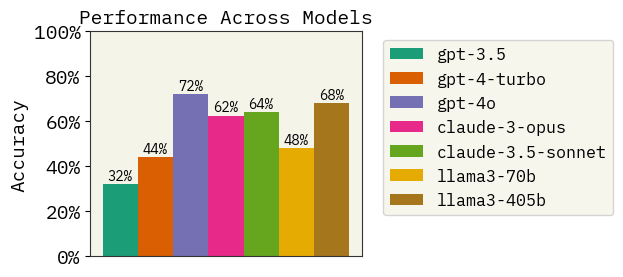

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#plt.bar(df.index, df['answer is logical '], color=colors)
for i, label in enumerate(df.index):
    plt.bar(label, df.loc[label, 'answer is logical '], color=colors[i % len(colors)], label=label, width=1.0)

# adding values on top of the bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, labels=[f'{height * 100:.0f}%' for height in bar.datavalues], padding=1, fontsize=10)


plt.title('Performance Across Models', fontsize=14)
plt.xlabel('')
plt.xticks([])
plt.ylabel('Accuracy', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig('e4-parta_13feb2025.png',dpi=300, bbox_inches='tight')
plt.savefig('e4-parta_13feb2025.svg', bbox_inches='tight')

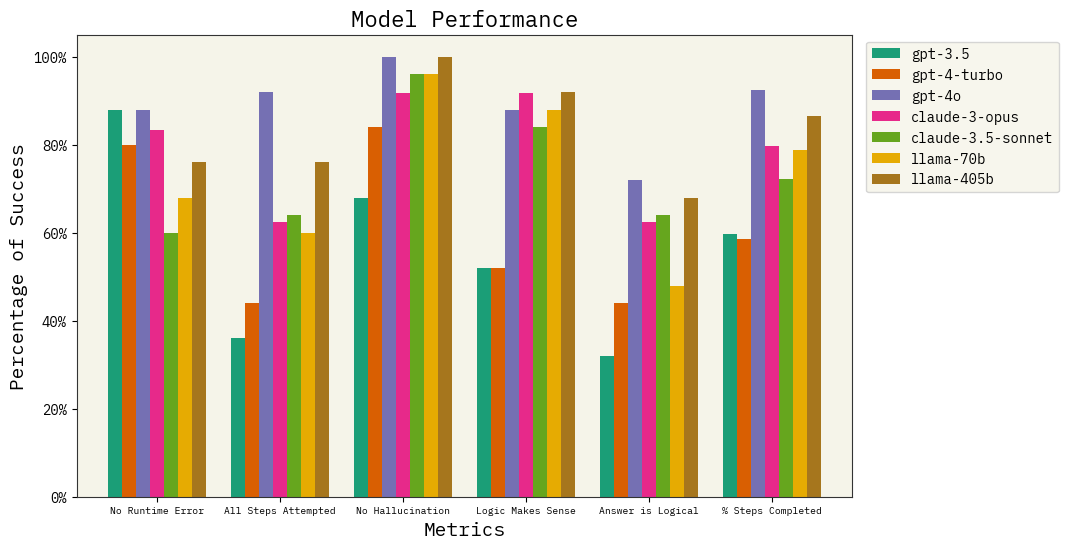

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

metrics = [
   "No Runtime Error",  "All Steps Attempted",
     "No Hallucination",  "Logic Makes Sense", "Answer is Logical",
     "% Steps Completed"
]
df_transposed = df.T

ax = df_transposed.plot(kind='bar', width=0.8, ax=ax)
plt.title("Model Performance", size=16)
plt.xlabel('Metrics', size=14)
plt.ylabel('Percentage of Success', size=14)
ax.set_xticklabels(metrics, rotation=0, size=7)
plt.ylim(0, 1.05)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
#plt.legend()

### task completion (logical final answer) vs N steps

In [ ]:
# logical final answer vs num. steps

result = worksheet.get("M242:V250")
models = worksheet.get("A231:A238")
models = [m[0] for m in models]
df = pd.DataFrame(result[1:], columns=result[0], index=models)
df = df.apply(pd.to_numeric)
df.index = shortnames
df = df.drop('gpt-4-preview')
steps1_logical_df = df
steps1_logical_df.head()

,1,2,3,4,5,6,7,8,9,10
gpt-3.5,1.0,1.0,0.3333,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
gpt-4-turbo,1.0,1.0,0.6667,0.3333,0.0,0.0,0.5,0.0,0.0,0.0
gpt-4o,1.0,1.0,1.0000,0.3333,1.0,0.5,0.5,0.5,0.5,0.5
claude-3-opus,1.0,1.0,1.0000,0.3333,1.0,0.5,1.0,0.5,1.0,0.0
claude-3.5-sonnet,1.0,1.0,0.6667,0.6667,0.5,0.5,1.0,0.0,0.5,0.0


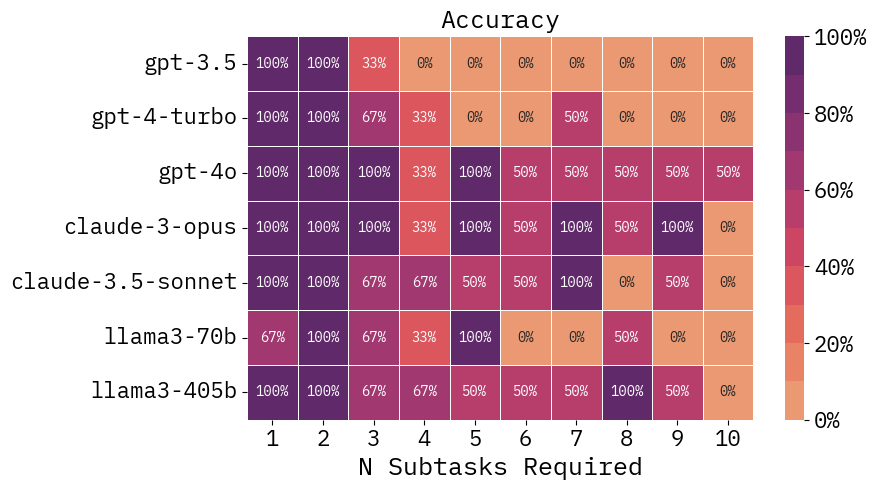

In [ ]:
intervals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cmap = sns.color_palette("flare", len(intervals) - 1)

plt.figure(figsize=(9, 5))
sns.heatmap(steps1_logical_df, annot=True, cmap=cmap, fmt=".0%", linewidths=0.5)

cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
cbar.ax.tick_params(labelsize=16)

# # Set labels and title
plt.xlabel("N Subtasks Required", fontsize=18)
plt.title("Accuracy", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('steps-part1.png',dpi=300)
plt.savefig('steps-part1.svg')
plt.show()

### steps completed vs N steps

In [ ]:
# steps completed vs num. steps
result = worksheet.get("M230:V238")
models = worksheet.get("A231:A238")
models = [m[0] for m in models]
df = pd.DataFrame(result[1:], columns=result[0], index=models)
df = df.apply(pd.to_numeric)
df.index = shortnames
df = df.drop('gpt-4-preview')
steps2_df = df
steps2_df.head()

,1,2,3,4,5,6,7,8,9,10
gpt-3.5,1.0000,1.0,0.5556,0.4167,0.5,0.0000,0.4286,0.4375,0.8333,0.3
gpt-4-turbo,1.0000,1.0,0.7778,0.5000,0.3,0.5833,0.5714,0.4375,0.0000,0.0
gpt-4o,1.0000,1.0,1.0000,0.8333,1.0,0.8333,0.7143,1.0000,0.9444,0.8
claude-3-opus,0.6667,1.0,0.7778,0.9167,1.0,0.8333,0.5000,0.5625,0.7222,0.4
claude-3.5-sonnet,1.0000,1.0,1.0000,0.8333,0.3,0.5833,1.0000,0.2500,0.5556,0.1


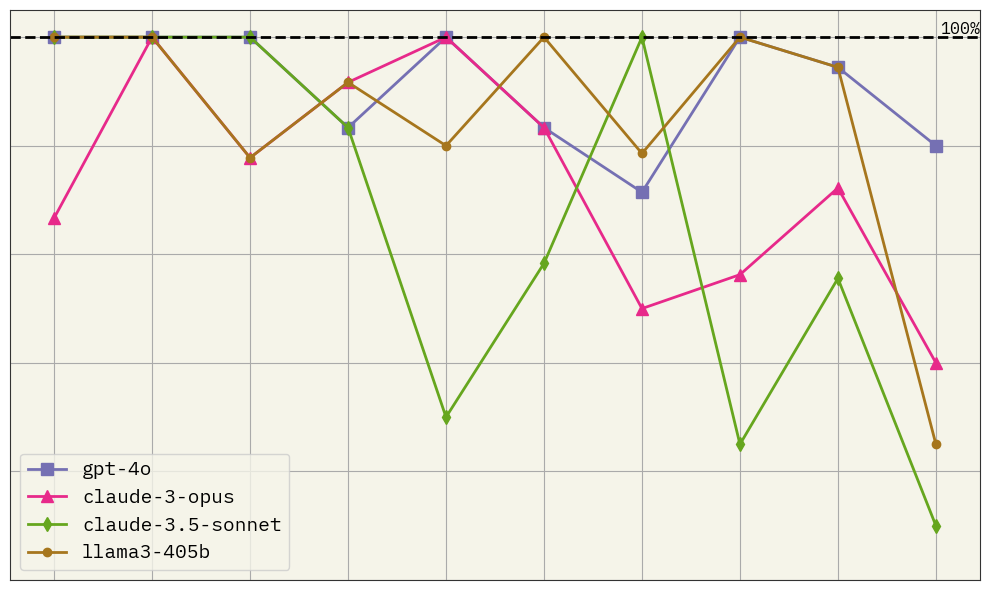

In [ ]:

plt.figure(figsize=(10, 6))

# Plot each model's row from steps2_df
plt.plot(steps2_df.loc['gpt-4o'], label='gpt-4o', marker='s',
         color='C2', linewidth=2, markersize=8)
plt.plot(steps2_df.loc['claude-3-opus'], label='claude-3-opus', marker='^',
         color='C3', linewidth=2, markersize=8)
plt.plot(steps2_df.loc['claude-3.5-sonnet'], label='claude-3.5-sonnet', marker='d',
         color='C4', linewidth=2, markersize=7)
plt.plot(steps2_df.loc['llama3-405b'], label='llama3-405b', marker='o',
         color='C6', linewidth=2)
plt.grid(True)
plt.legend(fontsize=14)
plt.ylim(0, 1.05)

# Format y-axis as percentages (0 to 1 => 0% to 100%)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Hide ticks\
# Turn on a semi-transparent grid
# plt.grid()
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Add a darker 100% horizontal line
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=2)

# Optionally, add a "100%" label on that line.
# We'll place it near the right edge of the plot. Adjust x-coord as needed.
x_left, x_right = plt.xlim()
plt.text(x_right, 1.0, "100%", color='black',
         ha='right', va='bottom', fontsize=12)


plt.tight_layout()
plt.savefig('steps-part2-oneplot.png', dpi=300, bbox_inches='tight')
plt.savefig('steps-part2-oneplot.svg', bbox_inches='tight')
plt.show()

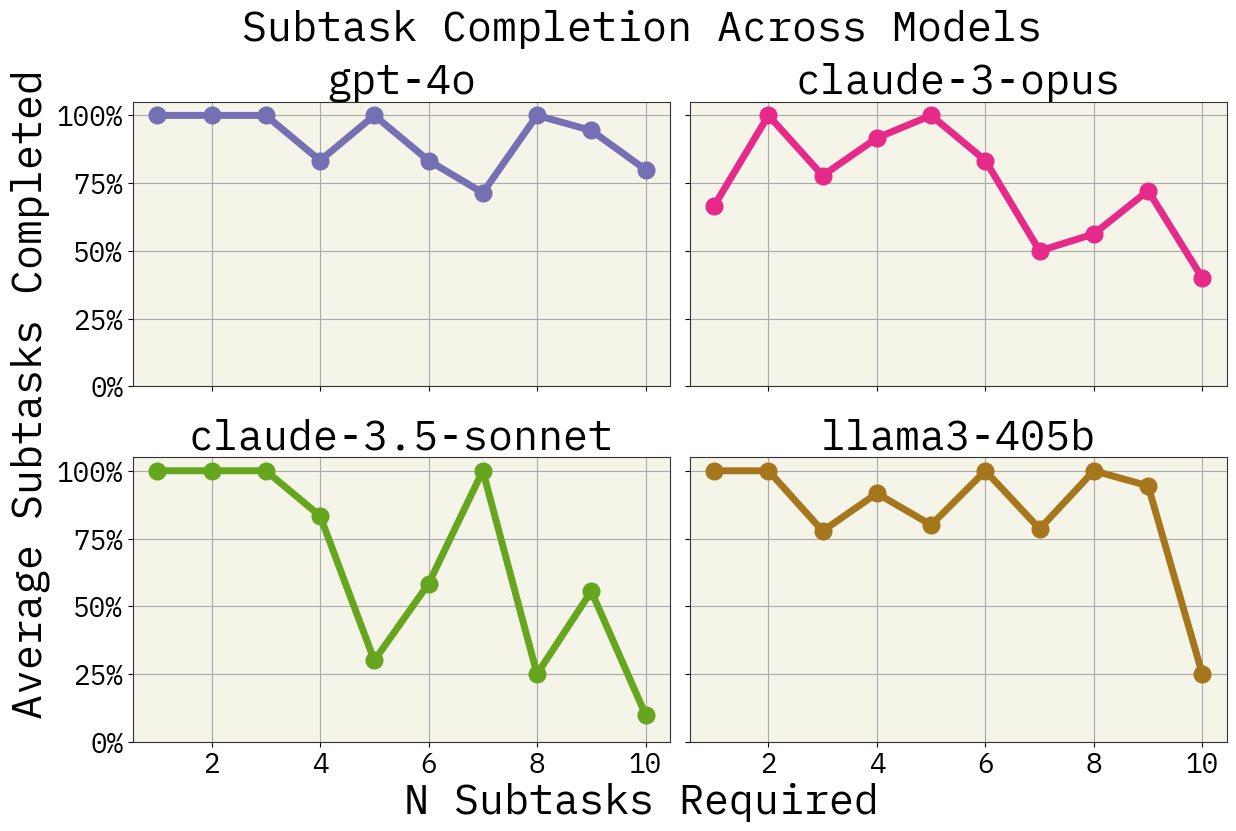

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

fsize_titles = 30
fsize_labels = 30
fsize_ticks = 20

axes[0, 0].plot(steps2_df.loc['gpt-4o'], marker='o', color='C2', linewidth=5, markersize=12)
axes[0, 0].set_title('gpt-4o', fontsize=fsize_titles)
axes[0, 0].set_ylim(0, 1.05)
axes[0, 0].yaxis.set_major_formatter(PercentFormatter(1.0))

axes[0, 1].plot(steps2_df.loc['claude-3-opus'], marker='o', color='C3', linewidth=5, markersize=12)
axes[0, 1].set_title('claude-3-opus', fontsize=fsize_titles)

axes[1, 0].plot(steps2_df.loc['claude-3.5-sonnet'], marker='o', color='C4',linewidth=5, markersize=12)
axes[1, 0].set_title('claude-3.5-sonnet', fontsize=fsize_titles)

axes[1, 1].plot(steps2_df.loc['llama3-405b'], marker='o', color='C6', linewidth=5, markersize=12)
axes[1, 1].set_title('llama3-405b', fontsize=fsize_titles)


plt.xticks(range(1, len(steps2_df.columns), 2), fontsize=fsize_labels)

for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=fsize_ticks)
    ax.grid(True)

fig.text(0.5, -0.01, 'N Subtasks Required', ha='center', va='center', fontsize=fsize_labels)  # x label
fig.text(-0.01, 0.5, 'Average Subtasks Completed', ha='center', va='center', rotation='vertical', fontsize=fsize_labels)  # y label
fig.suptitle("Subtask Completion Across Models", fontsize=fsize_titles, ha='center', va='top')

plt.tight_layout()
plt.savefig('steps-part2-r.svg', bbox_inches='tight')
plt.savefig('steps-part2-r.png',dpi=300, bbox_inches='tight')
plt.show()


# comparison analysis (python code exp)

In [ ]:
worksheet = sheets.worksheet("python code")

In [ ]:
result = worksheet.get("F65:M68")
df = pd.DataFrame(result[1:], columns=result[0])
df.set_index(df.columns[0], inplace=True)
df = df.apply(pd.to_numeric)

df.rename(index={"ReAct with Python REPL": "ReAct"}, inplace=True)
df.rename(index={"MDCrow": "MDCrow"}, inplace=True)

df.head()


,completed without runtime error,all steps attempted,Completed wo hallucination,logic makes sense,answer is logical,% step completed,std dev of % step completed
LLM Framework,,,,,,,
direct LLM,0.36,0.84,1.0,0.28,0.28,0.4986,0.337488
ReAct,0.88,0.52,1.0,0.52,0.24,0.5109,0.369800
MDCrow,0.88,0.92,1.0,0.88,0.72,0.9234,0.172381


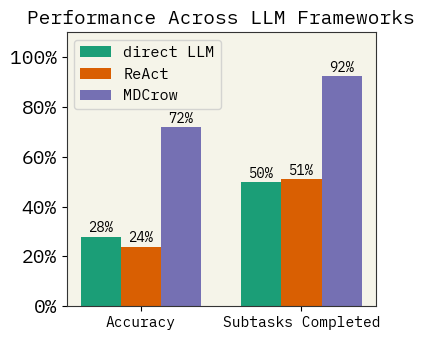

In [ ]:
labels = ['Accuracy', 'Subtasks Completed']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(4, 3.5))

# plot bars for each LLM framework
width = 0.25
bar_positions = [x - width, x, x + width, x + 2*width]  # adjust positions for each LLM
for i, (framework, color) in enumerate(zip(df.index, colors)):
    values = df.loc[framework, ['answer is logical', '% step completed']]
    ax.bar(bar_positions[i], values, width, label=framework, color=color)

ax.set_title('Performance Across LLM Frameworks', fontsize=14)
ax.set_xlabel('')
ax.set_ylim(0,1.1)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10.5)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc='upper left',fontsize=11)


# adding values on top of bars
for bar_set in ax.containers:
    ax.bar_label(bar_set, labels=[f'{height * 100:.0f}%' for height in bar_set.datavalues], padding=1, fontsize=10)

plt.tight_layout()
plt.savefig('compare-direct-llm-combined_8jan2025.png', dpi=300, bbox_inches='tight')
plt.savefig('compare-direct-llm-combined_8jan2025.svg', bbox_inches='tight')
plt.show()

### logical final answer vs N steps

In [ ]:
# uses metric "answer is logical"

result = worksheet.get("D78:N81")
df = pd.DataFrame(result[1:], columns=result[0])
df.set_index(df.columns[0], inplace=True)
df = df.apply(pd.to_numeric)

df.rename(index={"ReAct with Python REPL": "ReAct"}, inplace=True)
df.rename(index={"MDCrow": "MDCrow"}, inplace=True)

df.head()

,1,2,3,4,5,6,7,8,9,10
,,,,,,,,,,
direct LLM,1.0,0.25,0.0,0.3333,0.5,0.0,0.0,0.0,0.5,0.0
ReAct,1.0,0.25,0.0,0.0000,0.0,0.0,0.5,0.5,0.0,0.0
MDCrow,1.0,1.00,1.0,0.3333,1.0,0.5,0.5,0.5,0.5,0.5


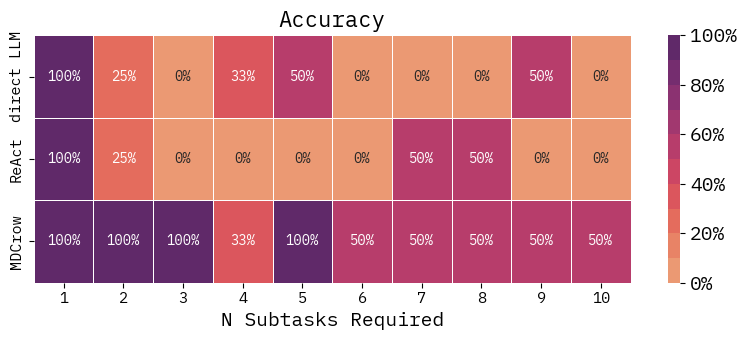

In [ ]:
fontsize=9
intervals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cmap = sns.color_palette("flare", len(intervals) - 1)

plt.figure(figsize=(8, 3.5))
sns.heatmap(df, vmin=0, annot=True, cmap=cmap, fmt=".0%", linewidths=0.5)

cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.set_ticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=14)

# # Set labels and title
plt.xlabel("N Subtasks Required", fontsize=14)
plt.tick_params(axis='both', labelsize=11)
plt.title("Accuracy", fontsize=16)

# Show the plot
plt.tight_layout()
plt.savefig('compare-steps-task_8jan2025.png',dpi=300, bbox_inches='tight')
plt.savefig('compare-steps-task_8jan2025.svg', bbox_inches='tight')
plt.show()